In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


# Group 5

Members:
- Aishlee C0913045
- Ashick Rijo C0910364
- Ernie Sumoso Vicuna C0881591
- Danilo Diaz C0889539
- Yogita Sharma C0913011


# Predictive Analysis
Prediction of the column __'bid'__ on July 30, 2021; based on the data from July 1 to July 29, 2021


# Stage 3 - Data Acquisition and Filtering

Data extraction is the process of __collecting__ or retrieving __data__ from a variety of sources, many of which may be poorly organized or completely unstructured.
Then the acquired data is filtered to __remove corrupted data__ that has no value to our predictive analysis.

__Internal data acquisition__

We were provided with an initial dataset about trading stocks

In [4]:
# load dataset
df = pd.read_csv('./dataset.csv')

# rows and columns of the data
print(df.shape)

# visualize the dataset
df.head()

(221046, 22)


,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


__External data acquisition__

We will acquire data of underlying stocks from July 1st, 2021 to July 30, 2021 using the Yahoo Finance API as structured external data.

The columns/attributes of our external data are:

- Date - specifies trading date
- Open - opening price
- High - maximum price during the day
- Low - minimum price during the day
- Close - close price adjusted for splits
- Adj Close - adjusted close price adjusted for both dividends and splits.
- Volume - the number of shares that changed hands during a given day

In [5]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()

# Getting Data From Yahoo Finance API

ticker_list=['SPY'] # Underlying stock --> Value to get the same stock data
start_date = date(year=2021,month=7,day=1) # Data should be from July 1st, 2021
end_date=date(year=2021,month=7,day=30) # until July 30, 2021
files=[]
external_data = pdr.get_data_yahoo(ticker_list, start=start_date, end=end_date)
external_data.reset_index(inplace=True)
external_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-01,428.869995,430.600006,428.799988,430.429993,416.109253,53441000
1,2021-07-02,431.670013,434.100006,430.519989,433.720001,419.289764,57697700
2,2021-07-06,433.779999,434.010010,430.010010,432.929993,418.526062,68710400
3,2021-07-07,433.660004,434.760010,431.510010,434.459991,420.005157,63549500
4,2021-07-08,428.779999,431.730011,427.519989,430.920013,416.582977,97595200


# Stage 4 - Data Extraction

Data extraction is the process of __extracting__ disparate __data__ and __transforming it__ into a __usable format__ for the analysis.

In this case, we need all our data in a __structured and tabular format__.

As we will see, both our __internal__ and __external__ data are in __tabular format__, so we don't need to perform any further extraction to our data.

In [6]:
print(f"Internal dataset number of rows: \t{df.shape[0]}")
print(f"Internal dataset number of columns: \t{df.shape[1]}")
print(f"Internal dataset shape (rows, columns): {df.shape}")

Internal dataset number of rows: 	221046
Internal dataset number of columns: 	22
Internal dataset shape (rows, columns): (221046, 22)


In [7]:
print(f"External dataset number of rows: \t{external_data.shape[0]}")
print(f"External dataset number of columns: \t{external_data.shape[1]}")
print(f"External dataset shape (rows, columns): {external_data.shape}")

External dataset number of rows: 	20
External dataset number of columns: 	7
External dataset shape (rows, columns): (20, 7)


# Stage 5 -Data Validation and Cleansing
On this stage we have to __establish validation rules__ and apply them on our datasets, __removing invalid data__.

For both our internal and external data, we will look for __missing values__ and __null values__.

In [8]:
#Dataset : Data
print("--Internal data null values--")
print(df.isnull().sum())
print("\n--External data null values--")
print(external_data.isnull().sum())

--Internal data null values--
symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

--External data null values--
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Apparently the column __'*'__ presents __192,007 null values__.

We will further analyze their unique values, as well as the total percentage null values

In [9]:
# Analyzing * column
print(df['*'].unique()) # unique values of the column
print(df['*'].value_counts()) # counting values for each unique value of the column
print("Count Null Values : ", df['*'].isnull().sum()) # counting null values
print("Percentage of Null Values : ", df['*'].isnull().sum()/df.shape[0]*100) # percentage of null values from the total values

[nan '*']
*    29039
Name: *, dtype: int64
Count Null Values :  192007
Percentage of Null Values :  86.86291541127186


As the column mostly presents __null values__ and __invalid data__, we will proceed with __removing the column '*'__

In [10]:
#Remove corructed column * from the dataset
df.drop(['*'], axis=1, inplace=True) #Removing the * column just null values

Now we can further analyze the rest of our __columns__ in our internal and external dataset.

In [11]:
print("Information about our Internal Dataset columns")
print(df.info())
print("Information about our External Dataset columns")
print('/n')
print(external_data.info())

Information about our Internal Dataset columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   symbol              221046 non-null  object 
 1   exchange            221046 non-null  object 
 2   date                221046 non-null  object 
 3   adjusted close      221046 non-null  float64
 4   option symbol       221046 non-null  object 
 5   expiration          221046 non-null  object 
 6   strike              221046 non-null  float64
 7   call/put            221046 non-null  object 
 8   style               221046 non-null  object 
 9   ask                 221046 non-null  float64
 10  bid                 221046 non-null  float64
 11  mean price          221046 non-null  float64
 12  iv                  221046 non-null  float64
 13  volume              221046 non-null  int64  
 14  open interest       221046 non-null  

Let's perform a __string validation__ to identify the __numerical __and__ categorical columns__ of both dataset

In [12]:
#Perform string Validation Categorical Columns

# Internal Data
vars_num_internal = [c for c in df.columns if df[c].dtypes!='O']
vars_cat_internal = [c for c in df.columns if df[c].dtypes=='O']

# External Data
vars_num_external = [c for c in external_data.columns if external_data[c].dtypes!='O']
vars_cat_external = [c for c in external_data.columns if external_data[c].dtypes=='O']


print("Internal Data")
print("\tNumerical Columns: ",end='')
print(vars_num_internal)
print("\tCategorical Columns: ",end='')
print(vars_cat_internal)
print("External Data")
print("\tNumerical Columns: ",end='')
print(vars_num_external)
print("\tCategorical Columns: ",end='')
print(vars_cat_external)

Internal Data
	Numerical Columns: ['adjusted close', 'strike', 'ask', 'bid', 'mean price', 'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega', 'gamma', 'theta', 'rho']
	Categorical Columns: ['symbol', 'exchange', 'date', 'option symbol', 'expiration', 'call/put', 'style']
External Data
	Numerical Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
	Categorical Columns: []


As we have identified our __categorical columns__, let's __delete leading and tailing white spaces__ on our categorical columns data.

In [13]:
# Perform string validation on categorical columns
for c in vars_cat_internal:
    print(c, df[c].unique())

#Apply strip to all categorical columns
print()
df['option symbol'] = df['option symbol'].str.strip()
df.dtypes

symbol ['SPY']
exchange ['NYSEArca']
date ['07/30/2021' '07/29/2021' '07/28/2021' '07/27/2021' '07/26/2021'
 '07/23/2021' '07/22/2021' '07/21/2021' '07/20/2021' '07/19/2021'
 '07/16/2021' '07/15/2021' '07/14/2021' '07/13/2021' '07/12/2021'
 '07/09/2021' '07/08/2021' '07/07/2021' '07/06/2021' '07/02/2021'
 '07/01/2021']
option symbol ['SPY   210730C00215000' 'SPY   210730P00215000' 'SPY   210730C00220000'
 ... 'SPY   210702P00520000' 'SPY   210702C00530000'
 'SPY   210702P00530000']
expiration ['07/30/2021' '08/02/2021' '08/04/2021' '08/06/2021' '08/09/2021'
 '08/11/2021' '08/13/2021' '08/16/2021' '08/18/2021' '08/20/2021'
 '08/23/2021' '08/25/2021' '08/27/2021' '08/30/2021' '09/01/2021'
 '09/03/2021' '09/07/2021' '09/10/2021' '09/17/2021' '09/30/2021'
 '10/15/2021' '11/19/2021' '12/17/2021' '12/31/2021' '01/21/2022'
 '02/18/2022' '03/18/2022' '03/31/2022' '06/17/2022' '06/30/2022'
 '09/16/2022' '12/16/2022' '01/20/2023' '03/17/2023' '06/16/2023'
 '12/15/2023' '07/28/2021' '07/26/2021' 

symbol                 object
exchange               object
date                   object
adjusted close        float64
option symbol          object
expiration             object
strike                float64
call/put               object
style                  object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                  int64
open interest           int64
stock price for iv    float64
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object

# Stage 6 - Data Aggregation and Representation

As our data is spread in __two datasets__ (internal and external). We need to __integrate both__ datasets together __into a unified view__

We will join both datasets based on the __date__ column as __common field__.

In [14]:
#Joining the two datasets by date

#Data-Internal
df['date'] = pd.to_datetime(df['date'])
df['expiration'] = pd.to_datetime(df['expiration'])
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')


#Data-External
external_data['Date'] = pd.to_datetime(external_data['Date'])
external_data.rename(columns={'Date': 'date' , 'Volume': 'Volume_Ext'}, inplace=True)
external_data.columns = external_data.columns.str.lower()

In [15]:
# Merging both datasets
dataset = df.merge(external_data, on='date', how='left')

Now we have __1 unified dataset__ with all our data. Let's check its number of rows and columns:

In [16]:
print(f"Unified dataset number of rows: \t{dataset.shape[0]}")
print(f"Unified dataset number of columns: \t{dataset.shape[1]}")
print(f"Unified dataset shape (rows, columns): {dataset.shape}")
dataset.tail()

Unified dataset number of rows: 	221046
Unified dataset number of columns: 	27
Unified dataset shape (rows, columns): (221046, 27)


,symbol,exchange,date,adjusted_close,option_symbol,expiration,strike,call/put,style,ask,...,vega,gamma,theta,rho,open,high,low,close,adj close,volume_ext
221041,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00630000,2023-12-15,630.0,P,A,206.50,...,0.750370,0.001112,-0.011128,-14.857175,428.869995,430.600006,428.799988,430.429993,416.109253,53441000.0
221042,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00635000,2023-12-15,635.0,C,A,2.20,...,0.710649,0.001053,-0.005507,0.496773,428.869995,430.600006,428.799988,430.429993,416.109253,53441000.0
221043,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00635000,2023-12-15,635.0,P,A,211.50,...,0.710649,0.001053,-0.010792,-15.014119,428.869995,430.600006,428.799988,430.429993,416.109253,53441000.0
221044,SPY,NYSEArca,2021-07-01,430.43,SPY 231215C00640000,2023-12-15,640.0,C,A,2.73,...,0.672488,0.000997,-0.005217,0.463973,428.869995,430.600006,428.799988,430.429993,416.109253,53441000.0
221045,SPY,NYSEArca,2021-07-01,430.43,SPY 231215P00640000,2023-12-15,640.0,P,A,216.50,...,0.672488,0.000997,-0.010467,-15.169052,428.869995,430.600006,428.799988,430.429993,416.109253,53441000.0


# Stage 7 - Data Analysis

The dataset contains 221,046 rows and 27 columns or features.

The variable we will try to predict is the column __'bid'__

**We will analyse the following:**

- 7.1 The target variable
- 7.2 Variable types (categorical and numerical)
- 7.3 Missing data
- 7.4. Numerical variables


## 7.1 Target

Let's begin by exploring the target distribution.
First we will __find__ the __unique values__ for every column.

In [17]:
dataset.apply(pd.unique)

symbol                                                            [SPY]
exchange                                                     [NYSEArca]
date                  [2021-07-30T00:00:00.000000000, 2021-07-29T00:...
adjusted_close        [438.51, 440.65, 438.83, 439.01, 441.02, 439.9...
option_symbol         [SPY   210730C00215000, SPY   210730P00215000,...
expiration            [2021-07-30T00:00:00.000000000, 2021-08-02T00:...
strike                [215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245...
call/put                                                         [C, P]
style                                                               [A]
ask                   [224.56, 0.01, 219.56, 214.56, 209.56, 204.56,...
bid                   [223.35, 0.0, 218.35, 213.35, 208.35, 203.35, ...
mean_price            [223.955, 0.0, 218.955, 213.955, 208.955, 203....
iv                    [-1.0, 0.361599, 0.384595, 0.351977, 0.328632,...
volume                [0, 50, 11, 2, 6, 13, 20, 14, 5, 4, 1, 3, 

As we notice, the columns __symbol, exchange,__ and __style__ only have __one value__ throughout the whole dataset.

The column __option_symbol__ has values that are __not relevant__ for our analysis.

These __4 columns won't contribute__ to the analysis so we can proceed to __drop__ them.

In [18]:
# drop symbol column
dataset.drop('symbol', axis=1, inplace=True)
#drop exchange
dataset.drop('exchange', axis=1, inplace=True)
#drop style
dataset.drop('style', axis=1, inplace=True)
#drop option_symbol
dataset.drop('option_symbol', axis=1, inplace=True)

dataset.shape

(221046, 23)

Now we are left with __24 columns__:

That is, __23 are predictive variables__ and __1__ is the __target variable__: __'bid'__

Let's evaluate the __target distribution__ using a histogram.

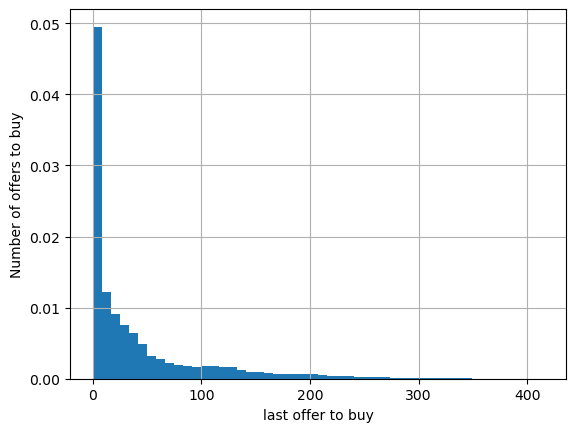

In [19]:
# histogran to evaluate target distribution
dataset['bid'].hist(bins=50, density=True)
plt.ylabel('Number of offers to buy')
plt.xlabel('last offer to buy')
plt.show()

### 7.2 Variable Types

Next, let's __identify__ the __categorical and numerical variables__ on our 23 predictive columns

In [20]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in dataset.columns if dataset[var].dtype == 'O']

# number of categorical variables
print('Number of categorical variables: ', len(cat_vars), '\n')
print(cat_vars)

Number of categorical variables:  1 

['call/put']


In [21]:
# now let's identify the numerical variables
tem_vars = ['date', 'expiration']

num_vars = [
    var for var in dataset.columns if var not in cat_vars and var != 'bid'
]

num_vars = list(set(num_vars) - set(tem_vars))
# number of numerical variables
print('Number of categorical variables: ', len(num_vars), '\n')
print(num_vars)

Number of categorical variables:  19 

['stock_price_for_iv', 'theta', 'adj close', 'delta', 'strike', 'mean_price', 'vega', 'open_interest', 'open', 'low', 'volume_ext', 'gamma', 'ask', 'rho', 'iv', 'close', 'adjusted_close', 'high', 'volume']


### 7.3 Missing values

Let's go ahead and find out __which variables/columns__ of the dataset __contain missing values__.

We can also display the __percentage of missing values__ of these variables as follows.

In [22]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in dataset.columns if dataset[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missing data

dataset[vars_with_na].isnull().mean().sort_values(ascending=False)

open          0.048524
high          0.048524
low           0.048524
close         0.048524
adj close     0.048524
volume_ext    0.048524
dtype: float64

Our dataset contains __6 variables__ with __missing values__

This means that to train a machine learning model with this data set, we need to __deal with these varaibles__. (4%)

To deal with them, we will __fill__ our __missing values with__ the __mean__ of each column.

In [23]:
#Missing values in numerical variables, with the mean
for i in vars_with_na:
    dataset[i].fillna(dataset[i].median(), inplace=True)

### 7.4 Numerical Variables

Now we can deal with the numerical variables.

Let's plot the __last offer to buy__ vs __days__ of July 2021 (from 1 to 29).

Text(0, 0.5, 'last offer to buy')

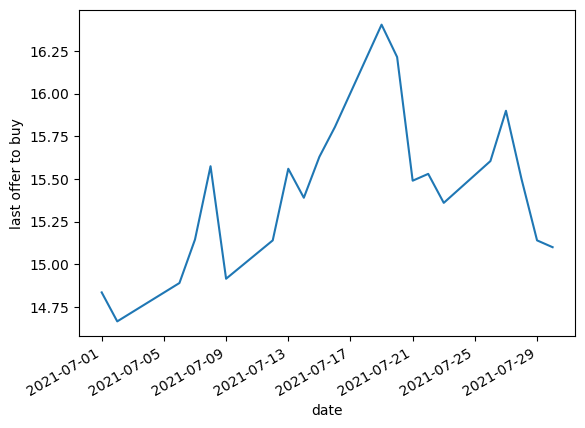

In [24]:
# plot last offer to buy over time
dataset.groupby('date')['bid'].median().plot()
plt.ylabel('last offer to buy')

We can plot multiple __histograms__, one for each of our __numerical continuous variables__.

Number of continuous variables:  19


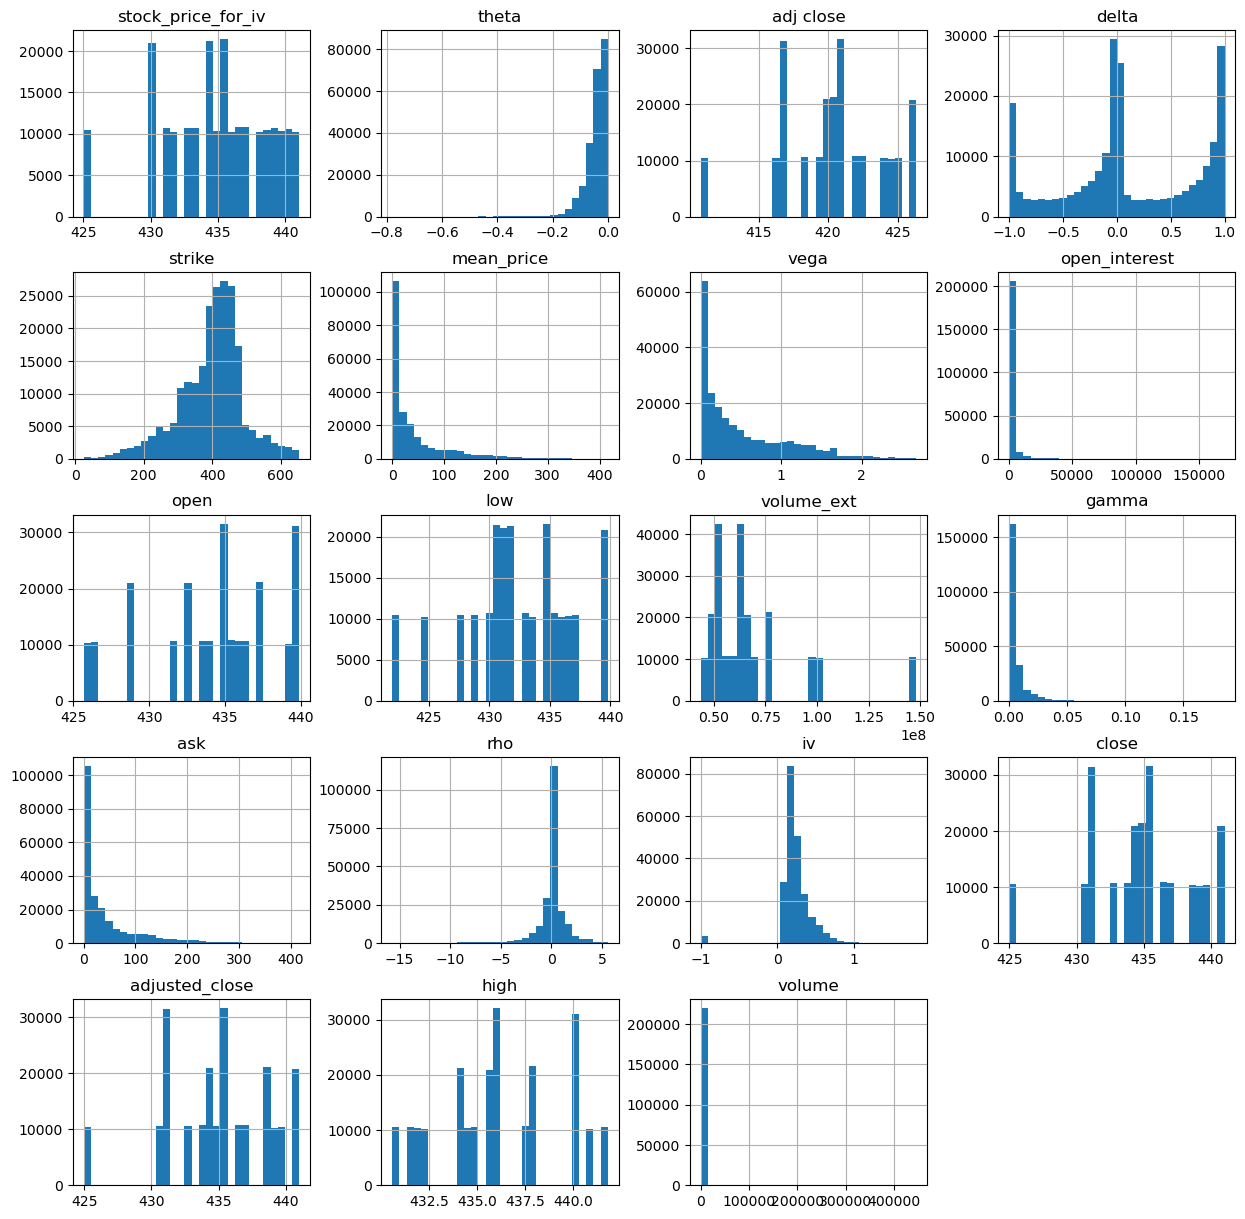

In [25]:
# lets plot histograms for all continuous variables
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in tem_vars]

print('Number of continuous variables: ', len(cont_vars))

dataset[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Now let's __split__ our data in our __train__ and __test__ datasets.

Remember we are __targeting__ the __'bid'__ column on July 30, 2021, based on the data from July 1 to 29.

In [26]:
X = dataset.loc[(dataset['date'] >= '2021-07-01')
                     & (dataset['date'] <= '2021-07-29')]
Y = dataset.loc[(dataset['date'] >= '2021-07-30')]

print(X.shape)
print(Y.shape)

x_train = X.drop(['bid','date','expiration'], axis=1)
y_train = X['bid']
x_test = Y.drop(['bid','date','expiration'], axis=1)
y_test = Y['bid']


(210320, 23)
(10726, 23)


In [27]:
# re-map strings to numbers, which determine quality

qual_mappings = {'C': 0, 'P': 1}

for var in cat_vars:
    x_train[var] = x_train[var].map(qual_mappings)
    x_test[var] = x_test[var].map(qual_mappings)


--

Finally we __build__ our __Linear Regression model__ to __predict__ the value of __'bid'__ on __July 30, 2021__

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

# Stage 8 - Data Visualization

We __communicate__ the __analysis results__ to the business users.

In this case, we will __plot__ the __predicted value__ of __'bid'__, based on our linear regression model.

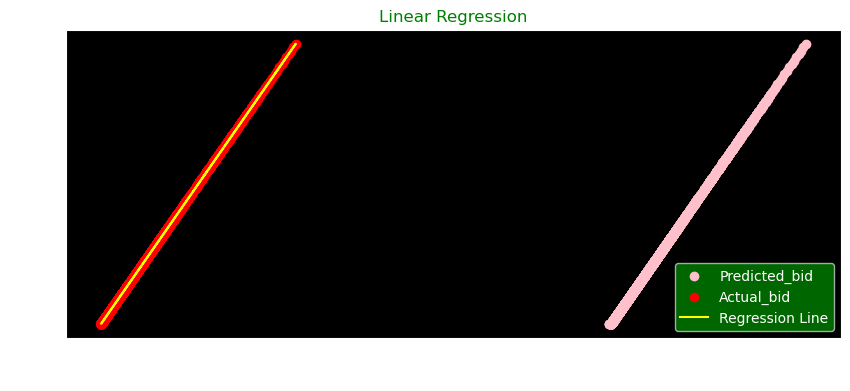

In [30]:
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')
plt.title('Linear Regression', color="green")
plt.scatter(y_pred, y_test, color="#FFC0CB")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_bid", "Actual_bid", "Regression Line"], loc="lower right", facecolor='green', labelcolor='white')

plt.xlabel('Predicted bid')
plt.ylabel('Actual bid')

plt.show()

As we can see, the __predicted bid values__ (line on the right) are very __far__ away from the __actual bid values__ (line on the left) from July 30, 2021

; therefore showing a __low accuracy__ on our Linear Regression __model__

This means that, __based on the stock market values__ from a month, we could __not predict__ the __last offer to buy (bid)__ (before accepting or rejecting the offer) on the stock market.

The main reason for these results are:
- There are many zero values on our dataset, which drag the mean and standard deviation values
- Given that the mean and standard deviation values do not represent our dataset, there are many outliers on our data
- These multiple outliers shrink our linear regression model, overfitting the prediction
- We are not performing multiple iterations on our data analysis given the time for the analysis
- For better results we could perform __imputations__ for these outliers and zero values on our unified dataset

# Stage 9 - Utilization of Analysis Results



Given the results, we would have to __perform more iterations__ on our data analysis __to accurately predict__ the __bid__ value on July 30, 2021.

However, the prediction of our linear regression model is similar to the actual values, but __shrinked to the right with an offset__.

By continue performing an __exploratory__ and __predictive analysis__, we could execute more tasks like:

- __deleting zero values__
-  identifying and deleting __outliers__

to present better results to the business users.

After we come with better results we could talk about __utilization of the analysis results__ in the following ways:

- As we succeed in predicting the bid value for the stocks on July 30, the business could deploy this linear regression model on their production environment to get a new predicition every month.
    
- The results could mark a precedent for the subsequent month and business users could act accordingly before the last day of the month comes.

- This will enhance the decision-making of traders, when buying stocks before they increase their last offer to buy.

- When applying these practices, the business could significantly increase their monthly revenue.

- As data scientists, we have to iteratively update the lineal regression model with newest datasets to have better and updated results.

# References

- Sklearn Linear Regression Model Documentation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Stock Market Analysis and Prediction using LSTM

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

- Stock Market Dataset

https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

- Yahoo stock market, finance, and business

https://ca.finance.yahoo.com/

- Understanding Relationship between features in Machine Learning

https://medium.com/@rameshkttr60/understanding-relationship-between-features-in-machine-learning-7c5f2e789b03